This script can be used for the visualization of the sonic waveform.

In [6]:
import os
import numpy as np
from array import array
from scipy.interpolate import interp1d
from scipy.signal import hilbert
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt

In [7]:
# fonts
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [8]:
dataset_directory = './dataset10/'

In [9]:
sr_dist = 2.33336 # distance between source and firt receiver
rr_dist = 0.1016 # distance between receivers
num_of_recgroups = 8 # number of receivers in one ring
num_of_rec = 13 # number of rings

num_of_timesteps =  5500
914.6941836915838
-912.3800116319953


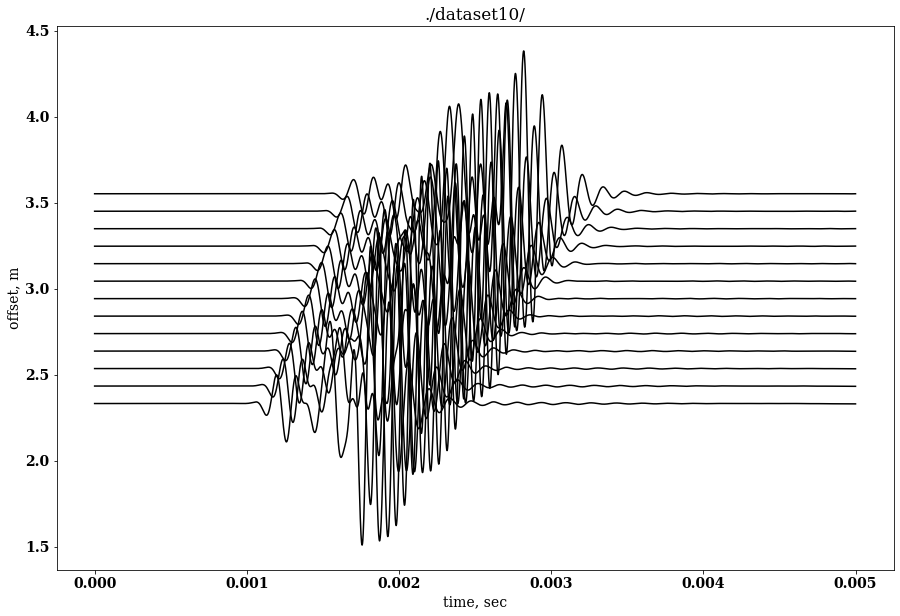

In [12]:
# read data from the folder
def read_seismogram_monomode(dataset_directory, filename):
    filename_r_time = dataset_directory + 'seism_time.bin'
    time_full = np.fromfile (filename_r_time)
    num_of_timesteps = len(time_full)
    print('num_of_timesteps = ', num_of_timesteps)
    filename_r = dataset_directory + filename
    seism_read = np.fromfile(filename_r)
    seismogram = np.zeros((num_of_rec, num_of_timesteps)) # common shot gather
    for irec in range(num_of_rec):
        seismogram[irec, :] = seism_read[irec*num_of_timesteps:(irec+1)*num_of_timesteps]
    if (seismogram.shape[0]+8)*seismogram.shape[1]*8 != os.path.getsize(filename_r):
        print('achtung! smth wrong with reading')
    return seismogram, time_full


def plot_seismogram_monomode(seismogram, time_full, dataset_directory):
    # plot seismograms
    # gain = np.exp(-4e5*time_full[:]**2)*2e1+1
    gain = 1/1000 # used to display waveforms with offset (y-axis) and time (x-axis)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax.set(xlabel='time, sec', ylabel='offset, m', title=dataset_directory)
    max_seism_value = np.max(seismogram)
    num_of_timesteps = len(time_full)
    # noise = np.random.rand(num_of_rec, num_of_timesteps)/5-0.1
    # N = 220
    # amp_map = np.zeros((num_of_rec, num_of_timesteps))
    for irec in range (0, seismogram.shape[0]):
        # amp_map[irec, :] = np.convolve(abs(seismogram[irec, :]), np.ones((N))/N, mode='same')
        plt.plot(time_full[:], sr_dist+rr_dist*irec+seismogram[irec, :]*gain, 'k')
    # ax.legend(loc=2)
    # ax.grid()

seismogram, time_full = read_seismogram_monomode(dataset_directory, 'seism0.bin')
print(np.max(seismogram))
print(np.min(seismogram))
plot_seismogram_monomode(seismogram, time_full, dataset_directory)